In [1]:
from pycaret.datasets import get_data
from pycaret.regression import *

# Alternative regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data set
dataset = get_data('diamond')
# Initialize setup
s = setup(data = dataset, target = 'Price', session_id = 123)
# Compare all models
best = compare_models()


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.2580
rf,Random Forest Regressor,725.2299,2336386.4997,1491.5615,0.9781,0.0785,0.0577,0.2350
lightgbm,Light Gradient Boosting Machine,721.5692,2747712.1060,1593.0198,0.9748,0.0750,0.0551,0.2500
gbr,Gradient Boosting Regressor,870.4619,2677900.4116,1616.3756,0.9744,0.0990,0.0750,0.0810
dt,Decision Tree Regressor,919.7628,3495425.3910,1821.5832,0.9664,0.1025,0.0744,0.0320
ridge,Ridge Regression,2491.2859,14957594.1466,3840.8633,0.8568,0.6470,0.2966,0.0310
lasso,Lasso Regression,2490.7990,14993880.8447,3845.5124,0.8565,0.6525,0.2961,0.3650
llar,Lasso Least Angle Regression,2490.8183,14993874.6841,3845.5117,0.8565,0.6526,0.2961,0.0290
br,Bayesian Ridge,2493.3298,14989750.3796,3844.9434,0.8565,0.6497,0.2967,0.0290
lr,Linear Regression,2532.0081,15309875.5719,3885.5542,0.8533,0.6642,0.3016,0.6390


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,721.0454,1859965.8012,1363.8056,0.9833,0.0806,0.0605
1,702.7472,1770809.8718,1330.7178,0.9785,0.0768,0.0580
2,730.9288,2082410.7871,1443.0561,0.9814,0.0760,0.0585
3,730.9018,1965098.7983,1401.8198,0.9825,0.0784,0.0561
4,638.1468,1093461.1821,1045.6869,0.9893,0.0760,0.0554
5,675.6744,1468815.2270,1211.9469,0.9831,0.0748,0.0566
6,852.0286,5188624.9667,2277.8553,0.9610,0.0882,0.0646
7,748.6741,1793660.9277,1339.2763,0.9823,0.0810,0.0586
8,720.4123,1670817.4976,1292.6011,0.9839,0.0809,0.0605


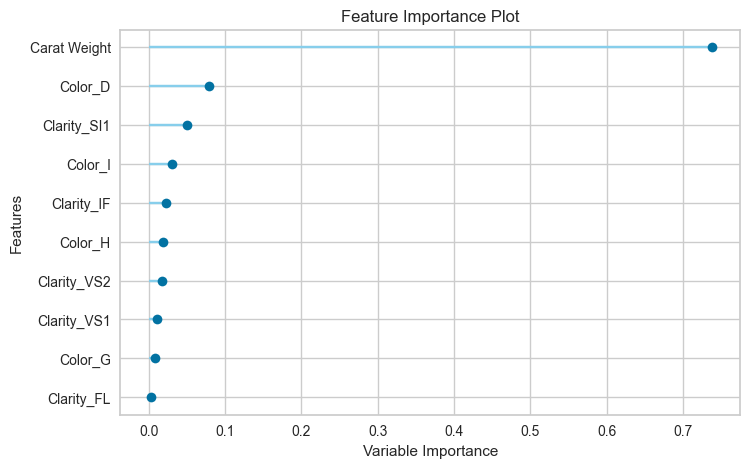

In [3]:
et_model = create_model('et')
plot_model(et_model, plot="feature")

In [4]:
# Plotting actual vs predicted with the pycaret model
predictions = predict_model(et_model, data=dataset)

predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,275.8983,772102.6396,878.6937,0.9926,0.0454,0.0224


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5169.000000
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3451.500000
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3183.000000
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4370.000000
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3171.000000
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6430.000000
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,5584.666667
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,6157.000000
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,10595.490000


In [5]:
actual = dataset['Price']
predicted = predictions['prediction_label']

mse = mean_squared_error(actual, predicted)
mse

772102.6395939293

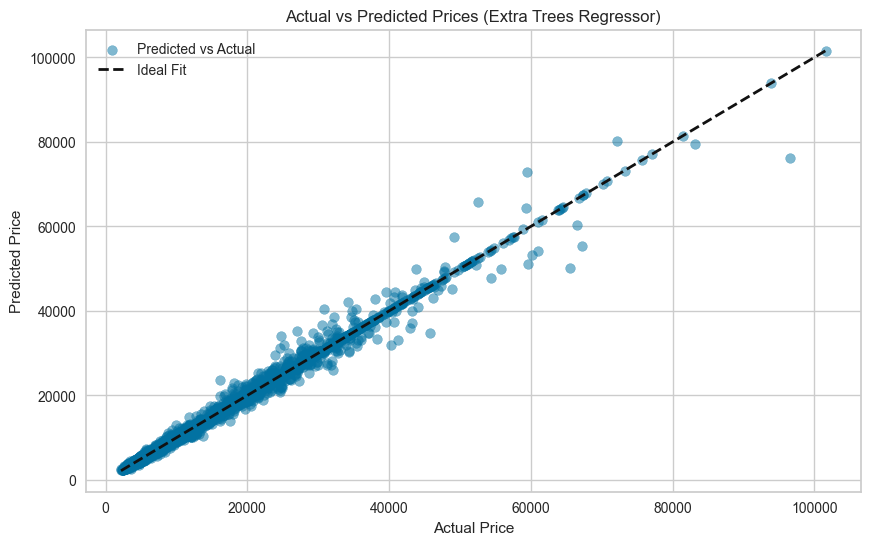

In [6]:
# Plotting actual vs predicted with pycaret model
plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, alpha=0.5, label='Predicted vs Actual')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Extra Trees Regressor)')
plt.legend()
plt.show()

### Prediction using linear regression model

In [7]:
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [8]:
# Preprocessing
## Since data set has string values - encoding to convert to numerical values for regression

dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,5169,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,0.83,3470,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
2,0.85,3183,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0.91,4370,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,3171,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
# Training and predicting using a Linear Regression model
X = dataset.drop('Price', axis=1) # Getting a data frame with all the independent variables only
y = dataset['Price'] # Getting a data frame with the dependent variable only

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # test split 20% for testing 80$ for training and random state used to reproduce the random sampling for testing and training


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

predictions

array([ 3566.28623401,  6358.59332947, 11256.41469881, ...,
       26356.41593279,  5577.60419213, 19053.63802333])

In [11]:
# Evaluate
mse = mean_squared_error(y_test, predictions)
mse

14589014.972407538

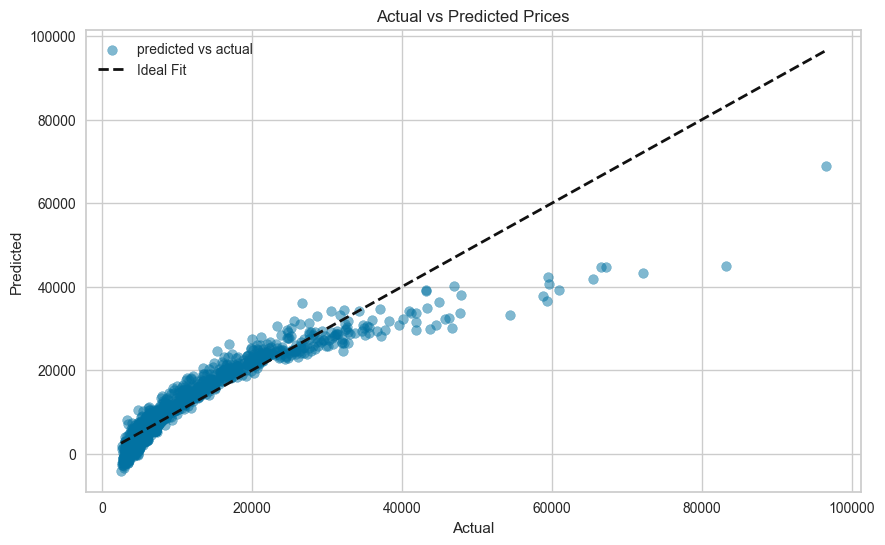

In [12]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, label="predicted vs actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label = "Ideal Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()